# CNN의 학습 과정에 대한 생각 정리 

"비전 시스템을 위한 딥러닝" 이라는 책에서 
CNN은 은닉층을 거쳐가며 학습이 진행되는데 
첫번째 은닉층은 직선이나 모서리와 같은 간단한 특징을 학습하며 뒤로 갈수록 이런 특징을 조합하여 도형, 꼭짓점, 원등의 특징을 인식한다.

은닉층이 뒤로 갈수록 사람의 이목구비와 같은 복잡한 형태를 학습한다 라는 내용이 있어 직접 시각화를 진행하며 이해를 해보고자 하였다.


## 이미지 선정 


처음에는 "강아지와 고양이" 이미지를 사용하여 진행을 해보고자 하였으나 조금 더 특징이 명확한 이미지로 진행해보고자 단순한 도형 이미지를 생성하고 진행해보았다.

## 결론


문서의 마지막에 결론을 추가하려 하였으나 문서가 길어짐에 따라 상단 부분으로 이동시켜 작성

내가 이해한 CNN 층의 학습 과정은 다음과 같다.
    1. 초반부에는 도형의 큰 특징을 학습한다.(대략적인 형태, 모서리와 같은)
    2. Conv 층을 거치며 학습이 진행됨에 따라 점차 도형의 안쪽을 학습하는 느낌으로 이해했다.
    3. 마치 해상도가 안좋은 이미지를 크게 확대했을 때의 느낌처럼 모서리는 희미해지더라도 특정 도형이 가지는 형태와 색감은 보존하려는 느낌이라고 생각했다.


사실 컴퓨터가 이해할 수 있는 형태로 학습이 진행되므로 사람이 직관적으로 보면서 이해하지 못하는 부분이 어느정도 당연하다는 생각이 들었다. 

## 이미지 추가 

In [10]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

* 기존에는 Collab에서 작업하였으나 Local 환경으로 옮겨서 작업함
* 그에 따른 이미지 경로 수정 

In [11]:
# img_path = "/content/Figure_img.png"
img_path = "./img_file/CNN_Test/Figure_img.png"
img_path

'./img_file/CNN_Test/Figure_img.png'

In [12]:
pic = plt.imread(img_path)

In [13]:
pic.shape

(150, 150, 3)

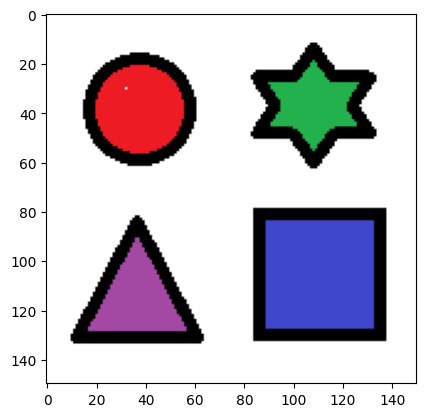

In [14]:
plt.imshow(pic)

## 라이브러리 로드

In [15]:
## Conv2D, MaxPooling2D, Flatten, Dense 층을 사용하기 위한 라이브러리 추가
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

## Sequential 모델을 사용하기 위한 기능 추가 
from tensorflow.keras.models import Sequential

In [16]:
# 선택한 데이터의 shape 확인
pic.shape

(150, 150, 3)

In [17]:
pic = tf.expand_dims(pic, axis=0)

## Conv , MaxPool 층 기능 설정

In [18]:
# 합성곱 층 통과적용
def conv_func(pic) : 
    a, x,y,z = pic.shape
    #print( x,y,z)
    conv2d_activation = Conv2D(16, (3, 3), activation='relu',padding="same", input_shape=(x, y, z))(pic)

    return np.array( conv2d_activation )

In [19]:
def maxpool_func(pic) : 
    maxpool_activation = MaxPooling2D(2,2)(pic)

    return np.array( maxpool_activation )

## Conv와 MaxPool을 적용하며 데이터의 변화 시각화를 통한 확인

### 1차 

In [20]:
conv_data = conv_func(pic)
conv_data.shape

(1, 150, 150, 16)

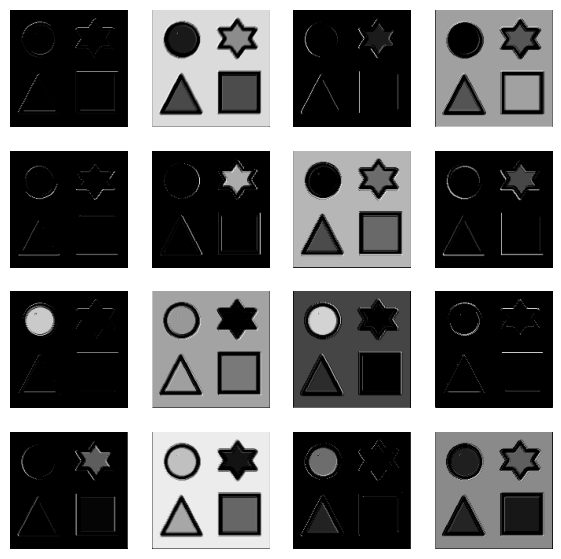

In [21]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(7, 7)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

In [22]:
pool_data = maxpool_func(conv_data)
pool_data.shape

(1, 75, 75, 16)

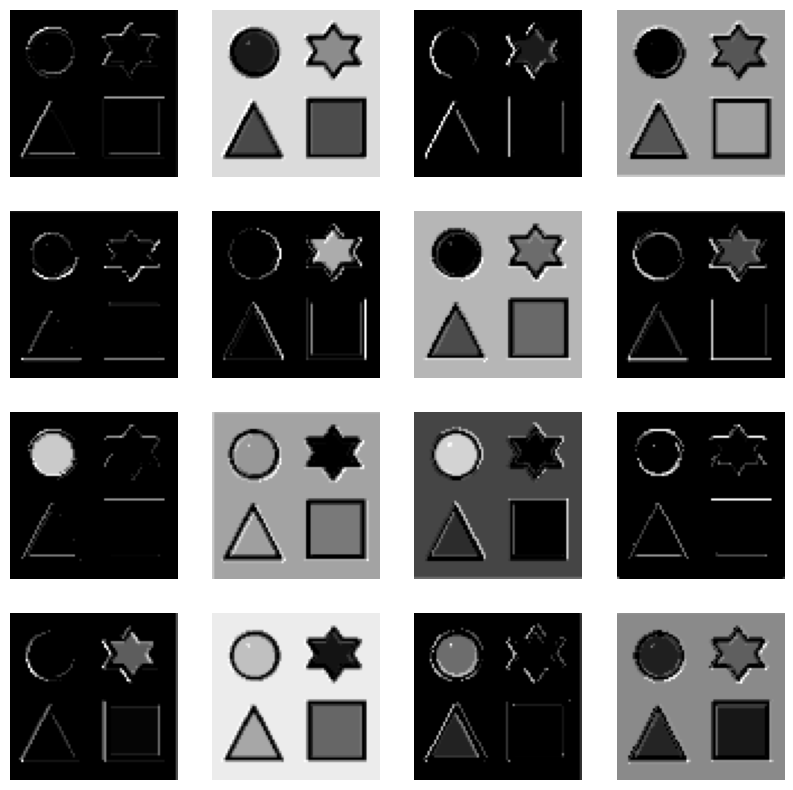

In [23]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(pool_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 2차 

In [24]:
conv_data = conv_func(pool_data)
conv_data.shape

(1, 75, 75, 16)

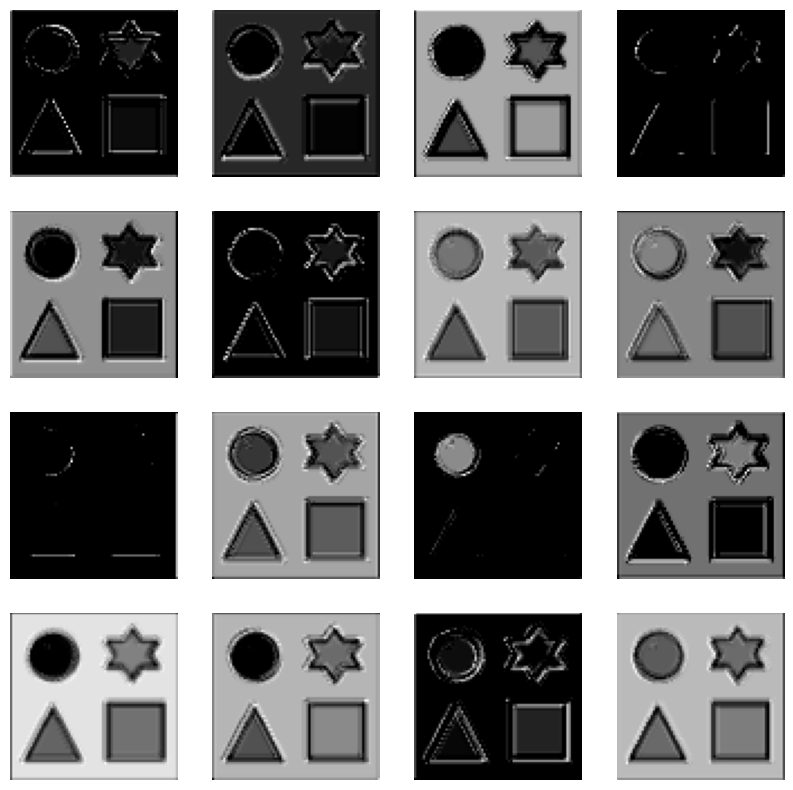

In [25]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

In [26]:
pool_data = maxpool_func(conv_data)
pool_data.shape

(1, 37, 37, 16)

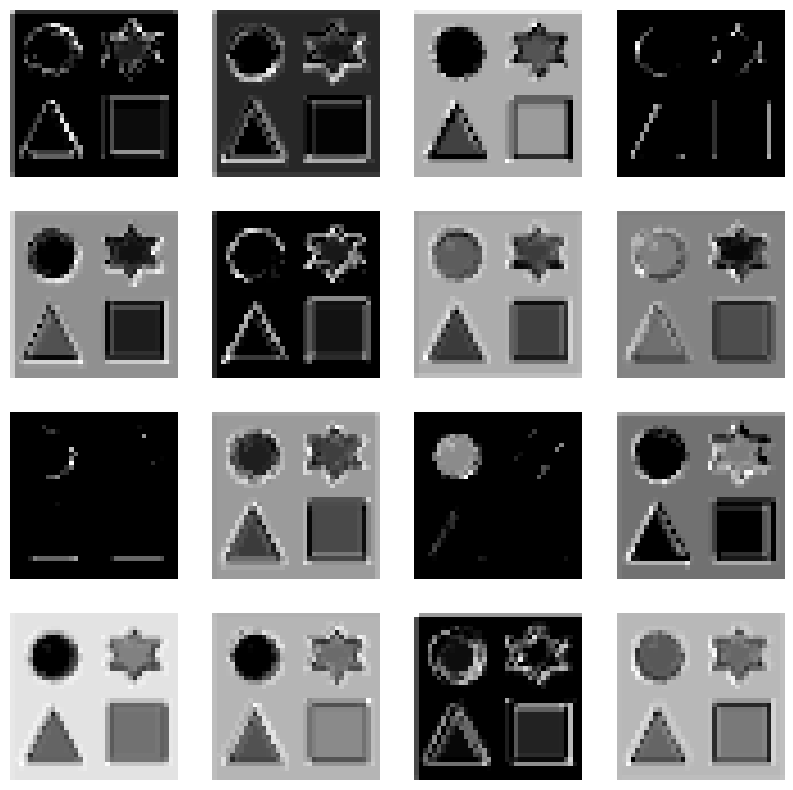

In [27]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(pool_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 3차

In [28]:
conv_data = conv_func(pool_data)
conv_data.shape

(1, 37, 37, 16)

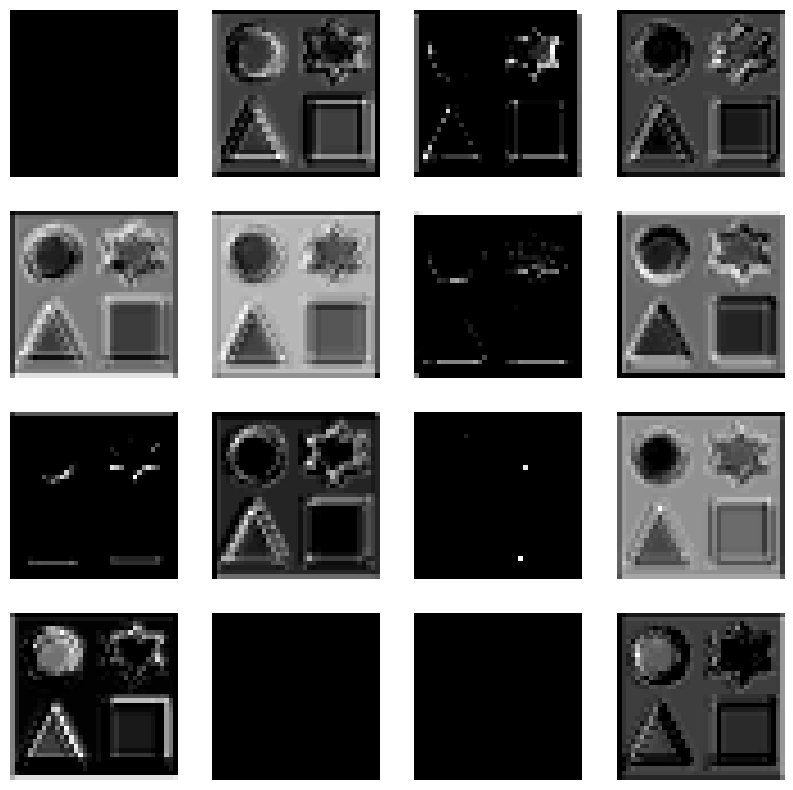

In [29]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

In [30]:
pool_data = maxpool_func(conv_data)
pool_data.shape

(1, 18, 18, 16)

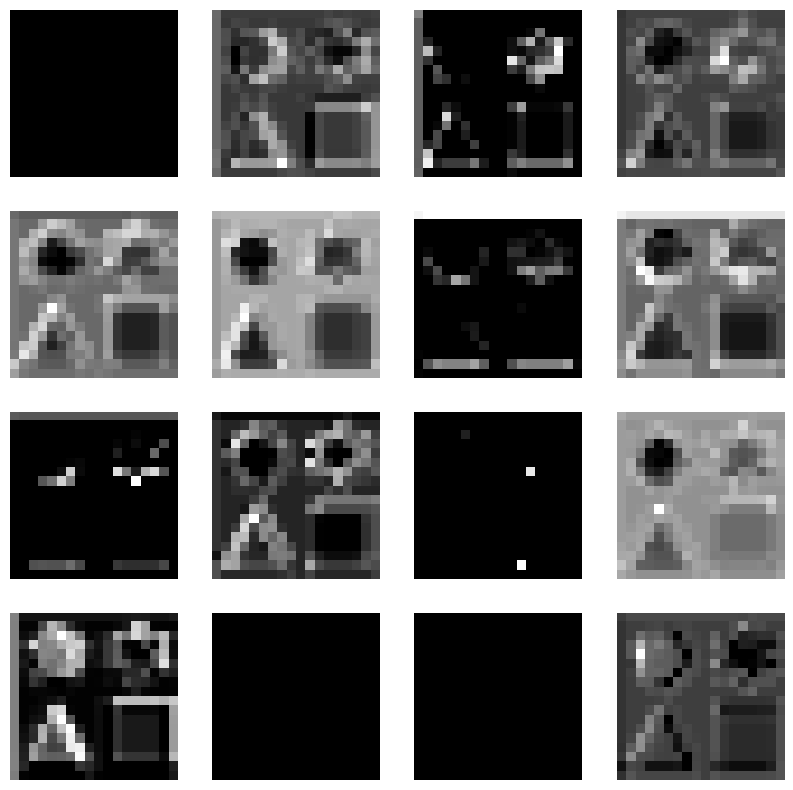

In [31]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(pool_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 4차

In [32]:
conv_data = conv_func(pool_data)
conv_data.shape

(1, 18, 18, 16)

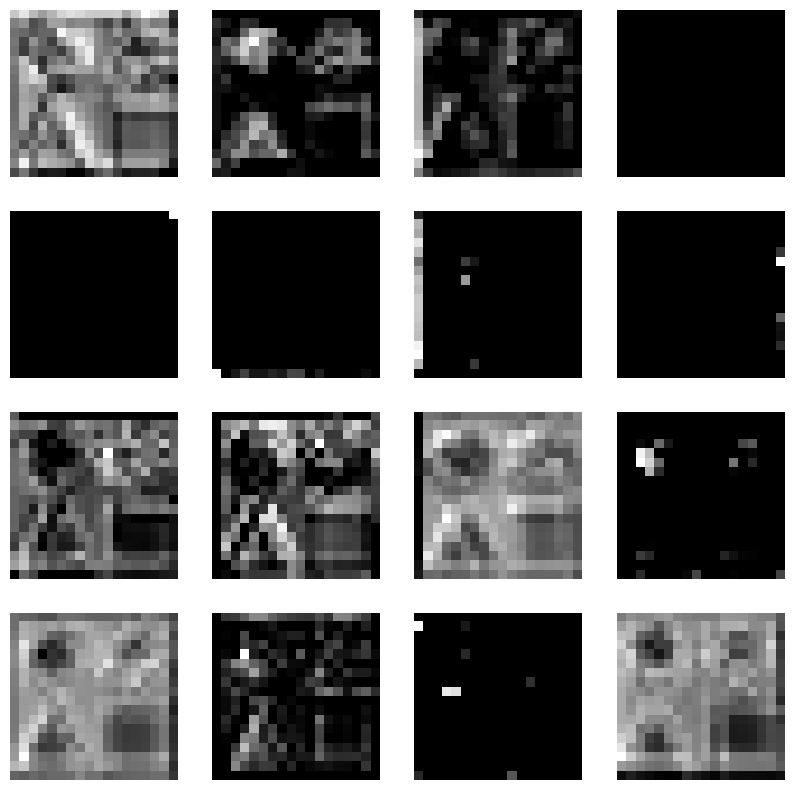

In [33]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

In [34]:
pool_data = maxpool_func(conv_data)
pool_data.shape

(1, 9, 9, 16)

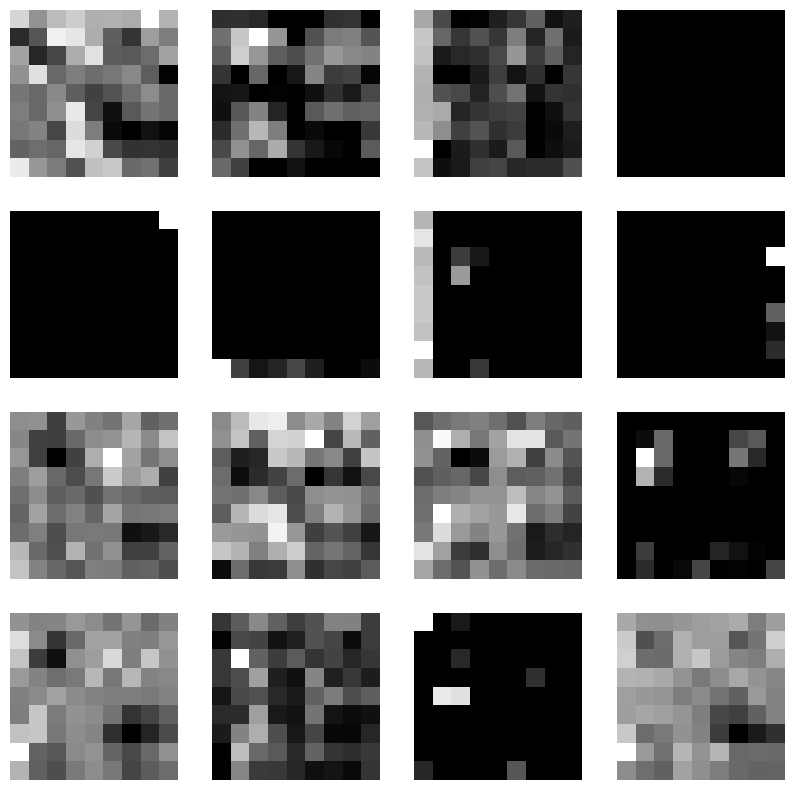

In [35]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(pool_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

## Conv 층만 계속적으로 적용하며 변화 상태 확인

### 1차 

In [36]:
conv_data = conv_func(pic)
conv_data.shape

(1, 150, 150, 16)

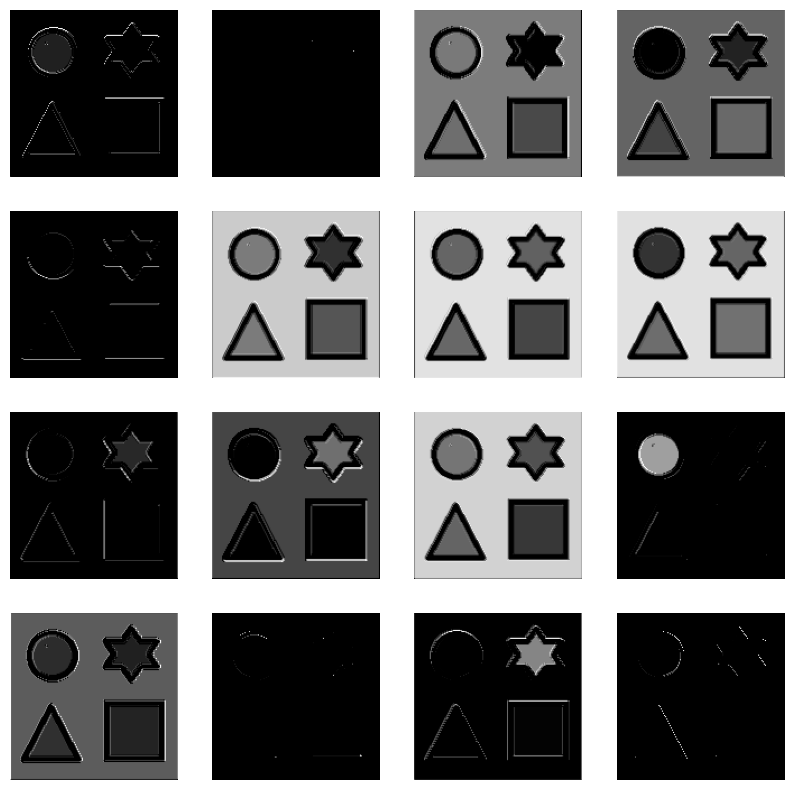

In [37]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 2차

In [38]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

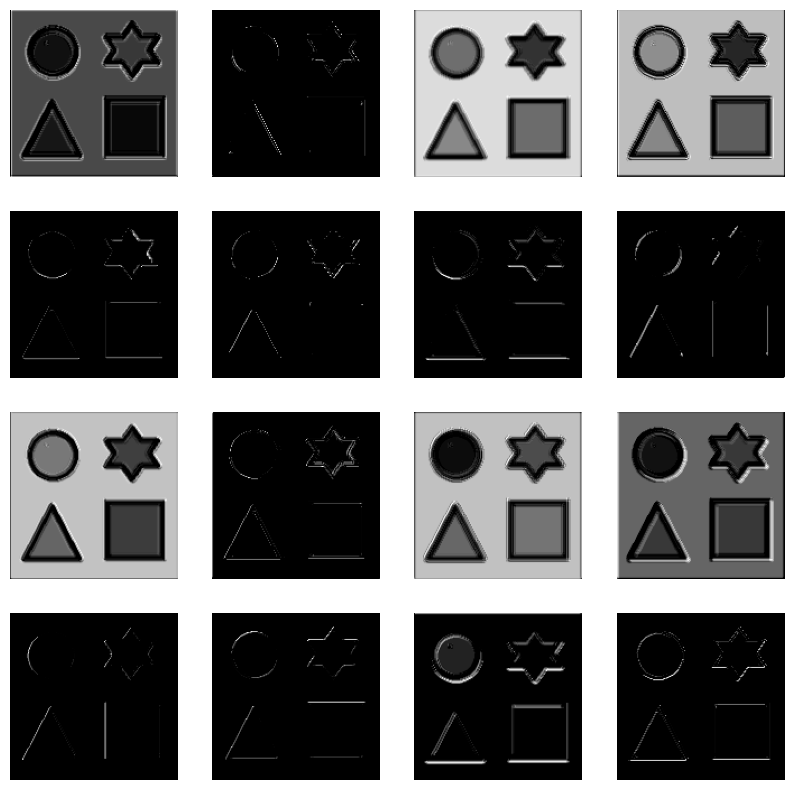

In [39]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 3차

In [40]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

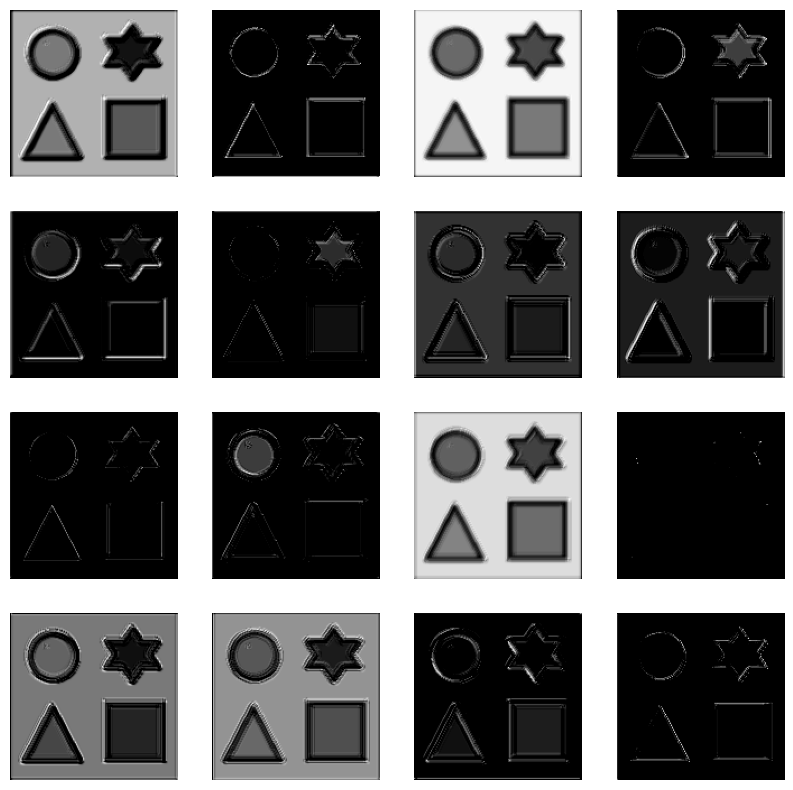

In [41]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 4차

In [42]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

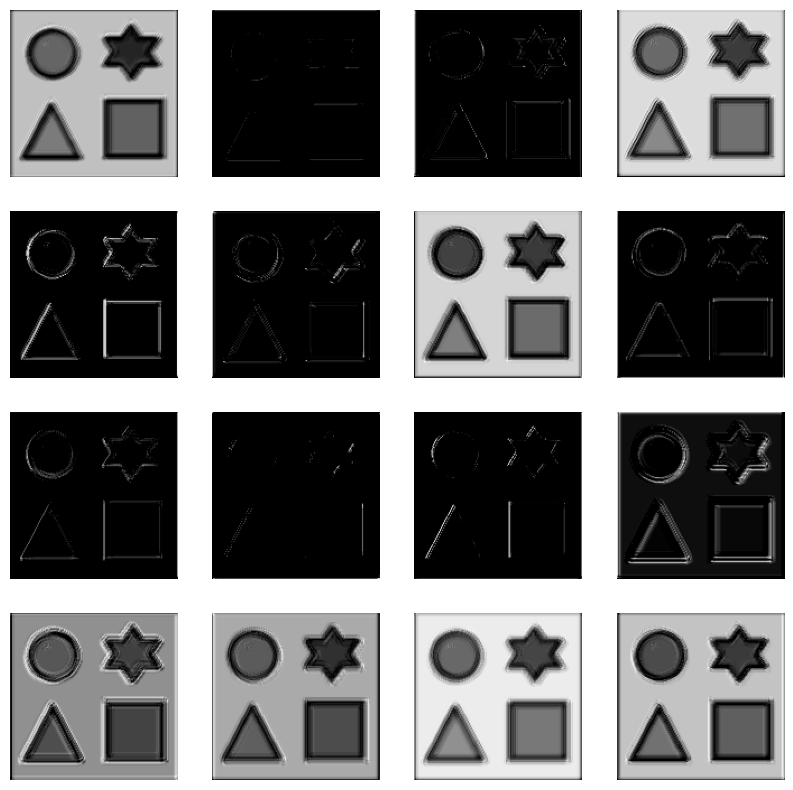

In [43]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 5차 

In [44]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

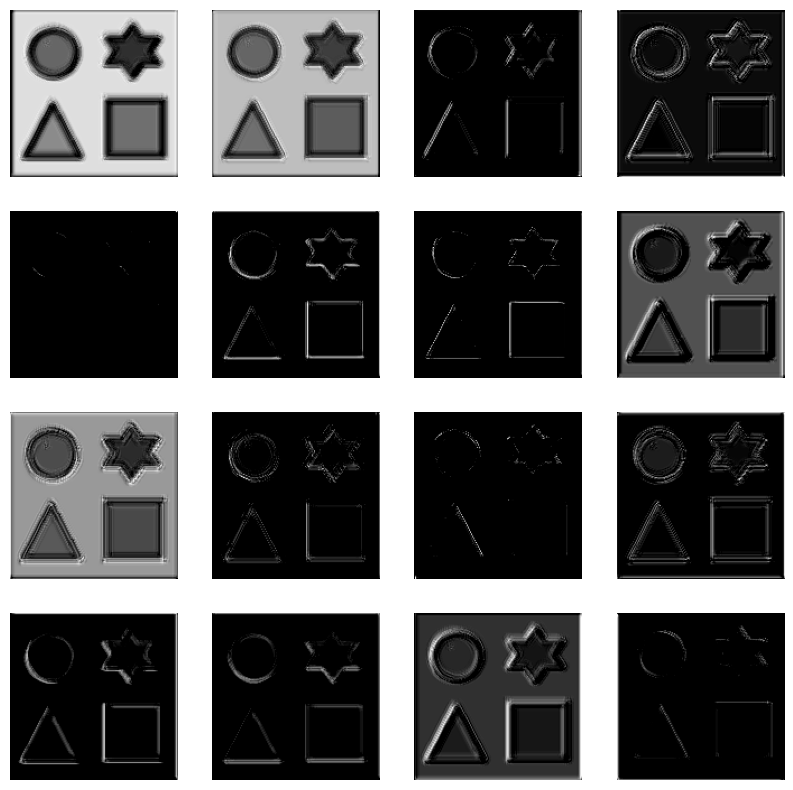

In [45]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 6차 

In [46]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

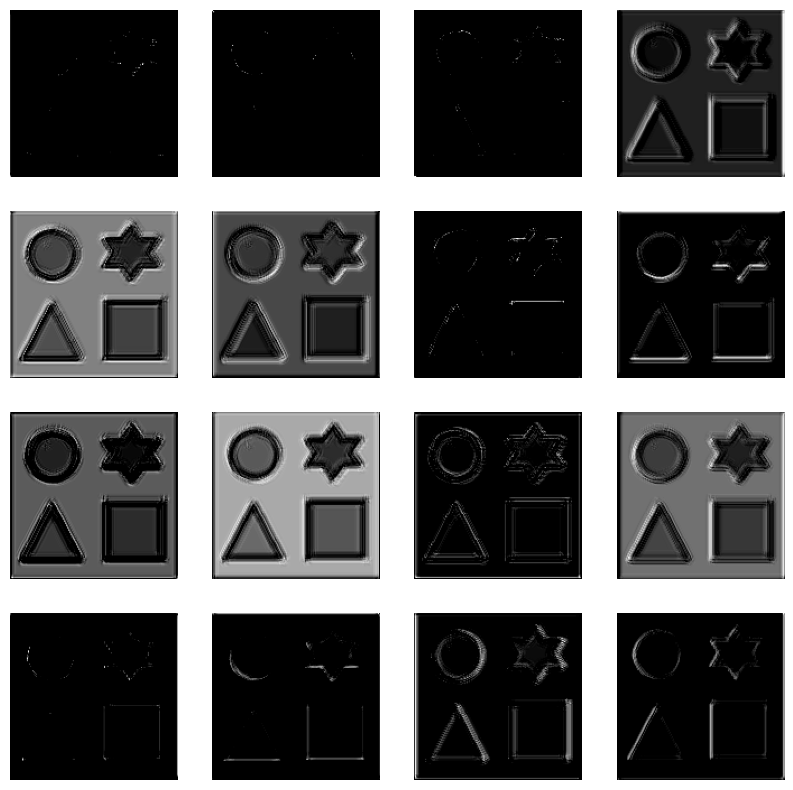

In [47]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 7차

In [48]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

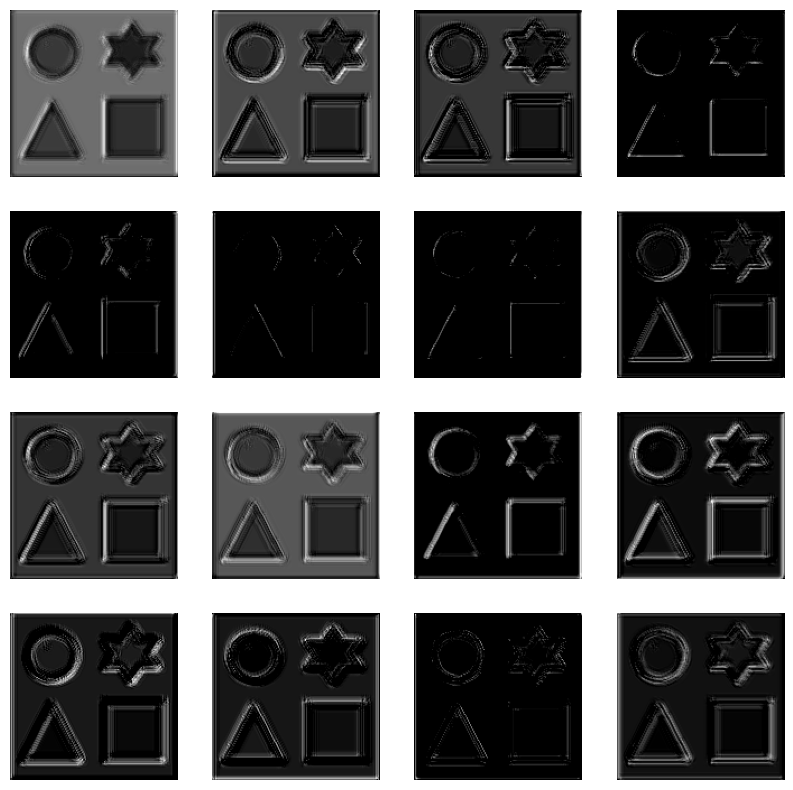

In [49]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 8차

In [50]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

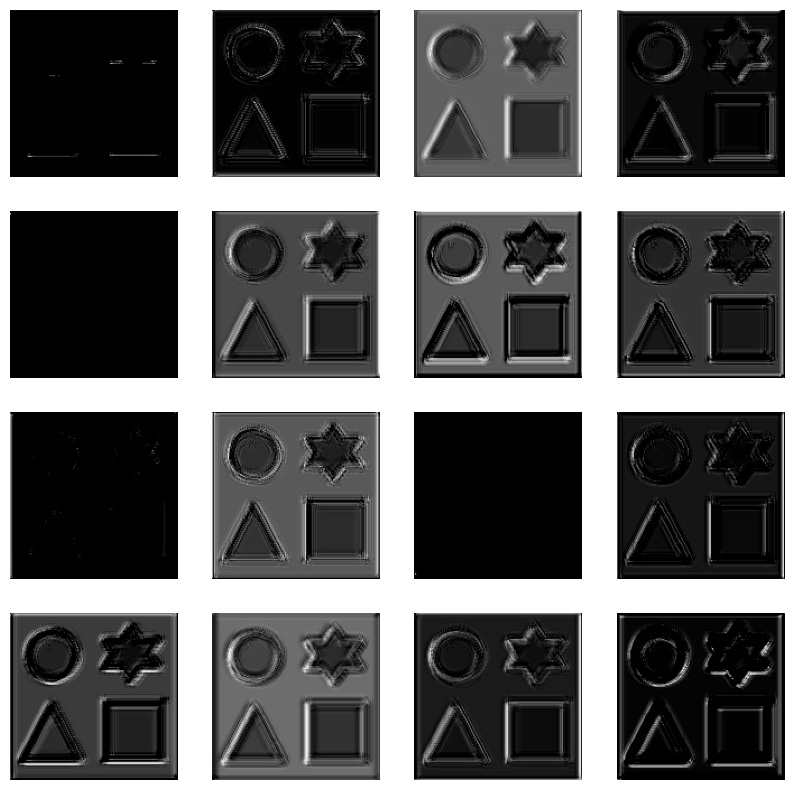

In [51]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 9차

In [52]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

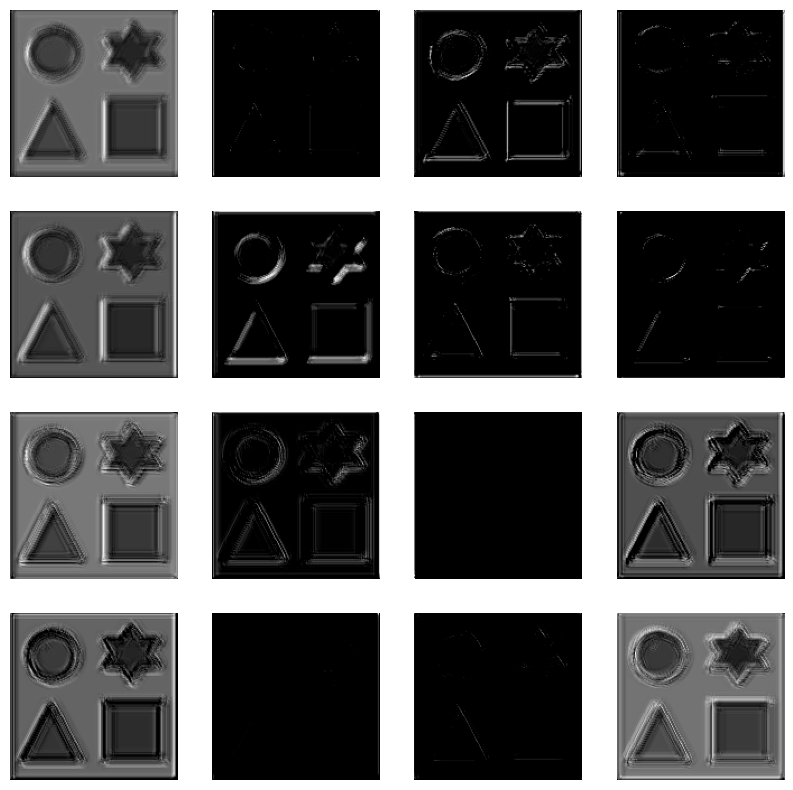

In [53]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

### 10차 

In [54]:
conv_data = conv_func(conv_data)
conv_data.shape

(1, 150, 150, 16)

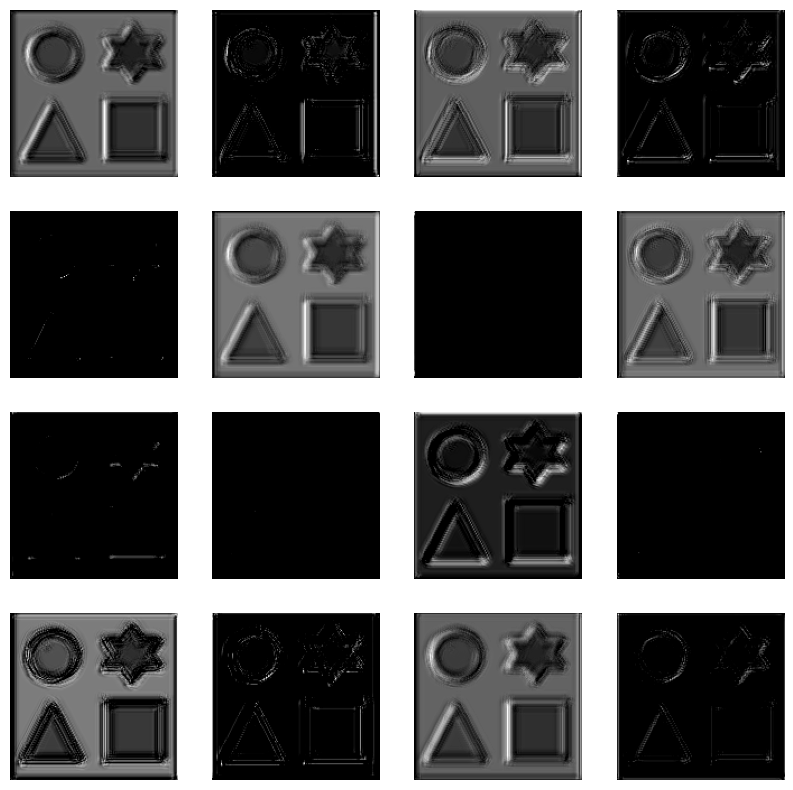

In [55]:
fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

## 20 ~ 50 단위 별로 끊어보기

In [56]:
pic.shape

TensorShape([1, 150, 150, 3])

(1, 150, 150, 16)


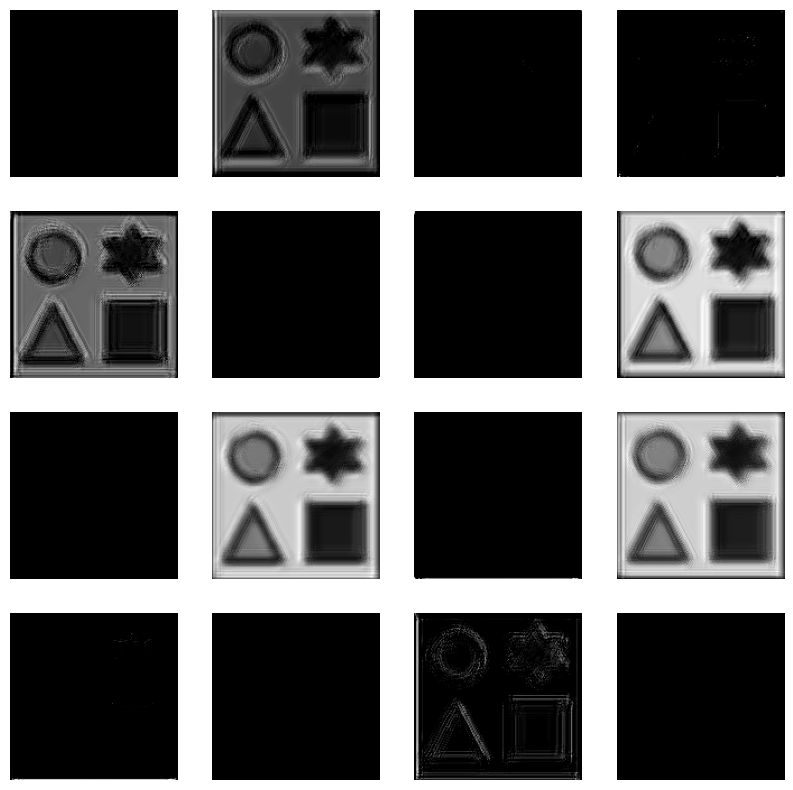

In [57]:
# 20회 
conv_data = conv_func(pic)

for i in range(1,20) :
    conv_data = conv_func(conv_data)

print( conv_data.shape )

fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

(1, 150, 150, 16)


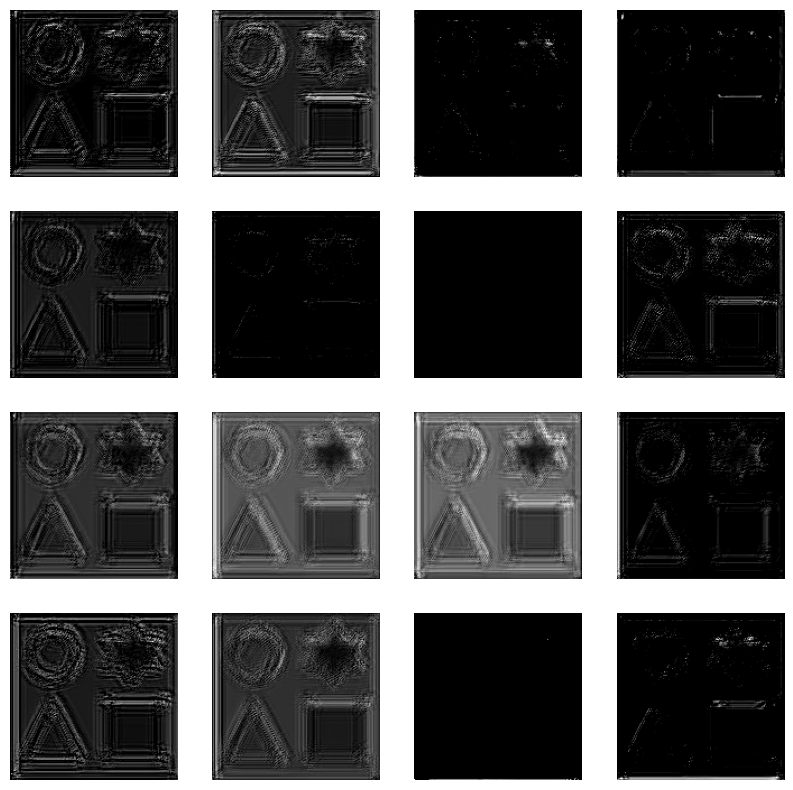

In [58]:
# 30회 
conv_data = conv_func(pic)

for i in range(1,30) :
    conv_data = conv_func(conv_data)

print( conv_data.shape )

fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

(1, 150, 150, 16)


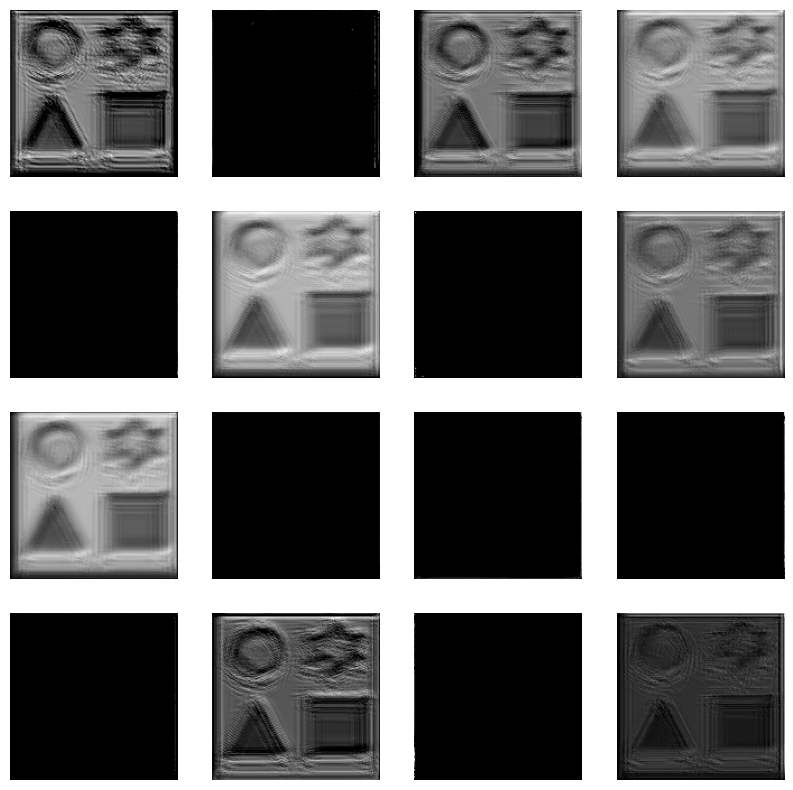

In [59]:
# 40회 
conv_data = conv_func(pic)

for i in range(1,40) :
    conv_data = conv_func(conv_data)

print( conv_data.shape )

fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')

(1, 150, 150, 16)


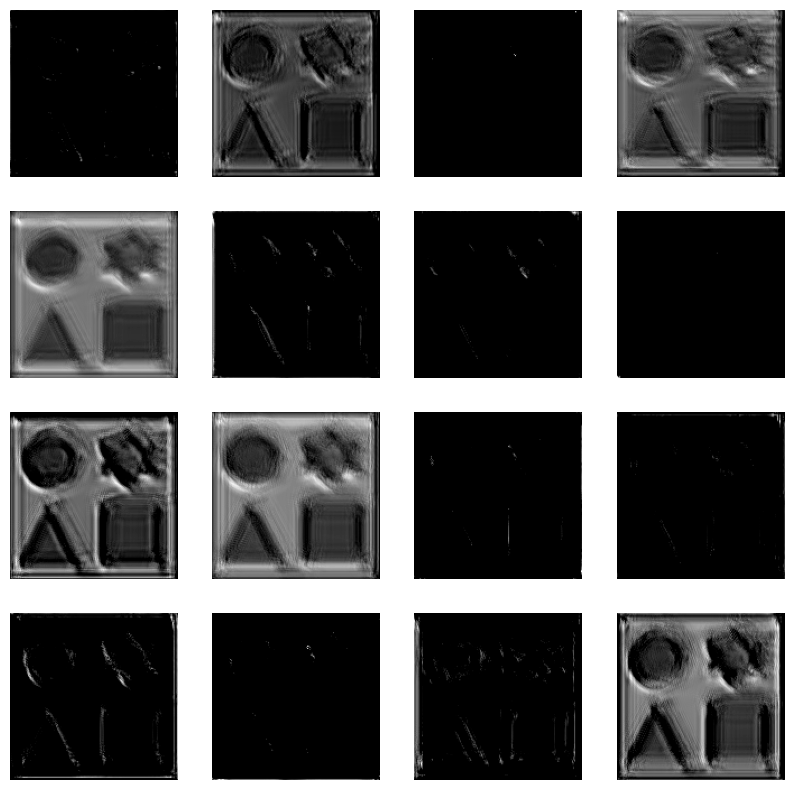

In [60]:
# 50회 
conv_data = conv_func(pic)

for i in range(1,50) :
    conv_data = conv_func(conv_data)

print( conv_data.shape )

fig, axes = plt.subplots(4, 4)
fig.set_size_inches(10, 10)

for i in range(16):
    axes[i//4, i%4].imshow(conv_data[0, :,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')